<img src="images/swung_logo_vector.png" alt="swung" style="width: 40%;"/>

# T21 Segysak Tutorial - Tony Hallam, April 2021



Welcome!

**Admin:**
  - Get the tutorial and data on Github (https://github.com/trhallam/segysak-t21-tutorial)
  - Run the tutorial on binder.
  - Limited interaction during the video but talk to the `segysak` experts in GatherTown and on the Tutorial Slack Channel

# Introduction

## What is `segysak`?

## Tour

## `segysak` vs X

## SEG-Y Files

## `segysak`

Make SEG-Y data easily accessible and creatable from Python

Simply put, `segysak` has grown as a set of tools to make SEG-Y data easily accessible and createable from Python.
It leverages a number of existing libraries but brings them together to try and improve the user experience, and
to remove as much boiler plate code as possible when dealing with SEG-Y.

The project started about a year ago at Transform 2020. Most of the work was done during that hackathon but it has
continued to develop since then with gradual improvements, bug-fixes and user support.

Although I'm the project owner and one of the primary users of `segysak` (I use it it in a lot of my PhD projects).
It is open for the subsurface community to not only utilise, but to contribute to grow to meet peoples needs.

I'd strongly encourage anyone with ideas and/or enthusiasm for changes or additions to get in touch so we can improve `segysak` for everyone.

## Tour

 - Github (source code, issues, contributions) - https://github.com/trhallam/segysak
 - Documentation (help, examples, API) - https://segysak.readthedocs.io/en/latest/
 - Slack (help, discussion, ideas, contributions) - https://swung.slack.com/messages/segysak/

Everything you need to know about `segysak` is available online. There is the Github repository where we manage the source code for the library and distribute the packages for installation via pip. 

There is also an issue tracker where you can raise bugs/problems or submit ideas or suggestions. It's also a good place to look for things that need doing if you want to help out.

We then have the documentation on readthedocs. Here you will find more detailed help, examples (which are avaialble as Notebooks) and the API (of function and member descriptions). This is a really useful place to come if you are stuck, or
need more detail because we cover a lot of the basics in the documentation. Indeed this workshop is heavily influenced
by the first few example notebooks you can find here.

Finally, we have the Slack forum hosted on swung.slack. This space is always open for people to ask questions or get help, even drop by just for a bit of discussion.

## `segysak` versus X

A lot of the time I get asked about segysak versus X in the Python world, where does it fit in?
The reality is, segysak doesn't so much compete with any part of the scientific stack but tries to form bridges over
the common space we often have to traverse. For example.

### `segyio`

 - `segysak` relies on `segyio` but abstracts a lot of the low level detail

segysak couldn't exist without segyio - segyio does all the hard work of interacting with the actual SEG-Y and segysak tries to make segyio a bit more accessible by providing a direct link between it and easy to use libraries like xarray.

### `xarray`

 - `segysak` extends `xarray` to make it easier to deal with SEG-Y files

Things like loading and writing of files are more automated. Trys to take care of tracking things like headers, and attributes for you.

Also includes extensions for common seismic related tasks.

## SEG-Y Files

File format defined by the SEG Organisation for storing seismic trace data.

Heavily geared toward limited size magnetic reel tapes.

SEG-Y data is a legacy format developing during a time when storage space was significantly more limited than the present. Specifically it was designed to allow the recording of shot records onto magnetic tapes. Whilst it has generally served the industry well, it is not particularly performant and there are a lot of inconsistencies between what information is included with a file and where is stored.

The most consistent aspects of a SEG-Y file are consistent though, and that is size and layout of the repeated header and data sections of the file. 

With `segysak` there is functionality to allow you to read some or all of the data and to inspect or extract information from the various parts of the headers.

**Basic Format (SEGY-Rev2):**

<img src="images/segy_layout.png" alt="swung" style="width: 100%;"/>


# Installation and Tutorial Setup

`pip install segysak`

Demo Data

Opening the Tutorial Notebook

`segysak` is currently only available from source or via `pip`.

To run this tutorial locally, you'll need to clone the entire tutorial repository which also contains the demo data. It is then just a matter of firing up Jupyter and opening the tutorial notebook.

We can check to make sure everything is running by importing the `segy_loader` function from `segysak.segy`.

In [1]:
from segysak.segy import segy_loader


C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\gemgis9\lib\site-packages\segysak\segy\_segy_headers.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Basic Imports and Test Data

In [2]:
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# specify the example file and check we have the example data

segy_file = pathlib.Path("data/volve10r12-full-twt-sub3d.sgy")
print("SEG-Y exists:", segy_file.exists())
 

SEG-Y exists: True


# Basic Usage

### Inspecting SEG-Y files

### Loading SEG-Y files

### `xarray.Dataset` basics

### NetCDF Files

### Editing and Saving

## Inspecting SEG-Y files


There are a number of utility functions in `segysak` designed to help you explore and understand the data in SEG-Y files without needing to load the entire SEG-Y file in.

For example we can look at the text header of the file by using the function `get_segy_texthead`.

In [4]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead

In [5]:
# examine the text header
get_segy_texthead(segy_file)

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
ÝCroC 3
C 4 First inline: 10090  Last inline: 10150
C 5 First xline:  2150   Last xline:  2351
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline number                : bytes 21-24
C26 Coordinate scale factor     : bytes 71-72
C27 X coordinate                : bytes 73-76
C28 Y coordinate                : bytes 77-80
C29 Trace start time/depth      : bytes 109-110
C30 Number of samples per trace : bytes 115-116
C31 Sample interval             : bytes 117-118
C32
C33
C34
C35
C36
C37
C38
C39
C40 END EBCDIC

## Inspecting SEG-Y files - trace header scan


The `segy_header_scan` function allows us to get a `pandas.DataFrame` containing information about the contents of the headers for the first few traces of a SEG-Y file. This saves us having to scan the whole file and often contains enough information for us to then load the file properly.

The DataFrame index names are the same as what `segyio` uses but `segysak` tables them and gives you a few bits of information. Importantly for properly loading SEG-Y data you will need to note the byte locations of header information you want. 

You can increase the number of traces you want to scan by setting the `max_traces_scan` keyword in the function - by default it is 1000 traces.

Try using the context manager to display more rows.
```python
with pd.option_context("display.max_rows", 100):
    display(df)
```

In [6]:
# scan the headers to check
scan = segy_header_scan(segy_file, max_traces_scan=2000)
scan

  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,100.590,57.896096,1.0,50.75,100.5,150.25,202.0
TRACE_SEQUENCE_FILE,5,2000.0,10094.455,2.851673,10090.0,10092.00,10094.0,10097.00,10099.0
FieldRecord,9,2000.0,10094.455,2.851673,10090.0,10092.00,10094.0,10097.00,10099.0
TraceNumber,13,2000.0,100.590,57.896096,1.0,50.75,100.5,150.25,202.0
EnergySourcePoint,17,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [8]:
with pd.option_context("display.max_rows", 100):
    display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,1.005900e+02,57.896096,1.0,5.075000e+01,100.5,1.502500e+02,202.0
TRACE_SEQUENCE_FILE,5,2000.0,1.009445e+04,2.851673,10090.0,1.009200e+04,10094.0,1.009700e+04,10099.0
FieldRecord,9,2000.0,1.009445e+04,2.851673,10090.0,1.009200e+04,10094.0,1.009700e+04,10099.0
TraceNumber,13,2000.0,1.005900e+02,57.896096,1.0,5.075000e+01,100.5,1.502500e+02,202.0
EnergySourcePoint,17,2000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
CDP,21,2000.0,2.249590e+03,57.896096,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0
CDP_TRACE,25,2000.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
NSummedTraces,31,2000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
NStackedTraces,33,2000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0


## Inspecting SEG-Y files - trace header scrape


We can also extract all of the trace header information using `segy_header_scrape`. This function creates a complete copy of the traces headers as a `pandas.DataFrame`. On larger files it can take a little bit of time to scan all the traces. You can see even on this small volume there are 12,322 traces.

The column names again are the same as in `segyio`.

We can do a quick check of the headers here by creating some simple plots. If you're used to loading SEG-Y in commercial software they usally offer you something showing trace number vs value.

In [9]:
trace_headers = segy_header_scrape(segy_file)
trace_headers

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,10090,10090,1,0,2150,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10090,10090,2,0,2151,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10090,10090,3,0,2152,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10090,10090,4,0,2153,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10090,10090,5,0,2154,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12317,198,10150,10150,198,0,2347,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12318,199,10150,10150,199,0,2348,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12319,200,10150,10150,200,0,2349,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12320,201,10150,10150,201,0,2350,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


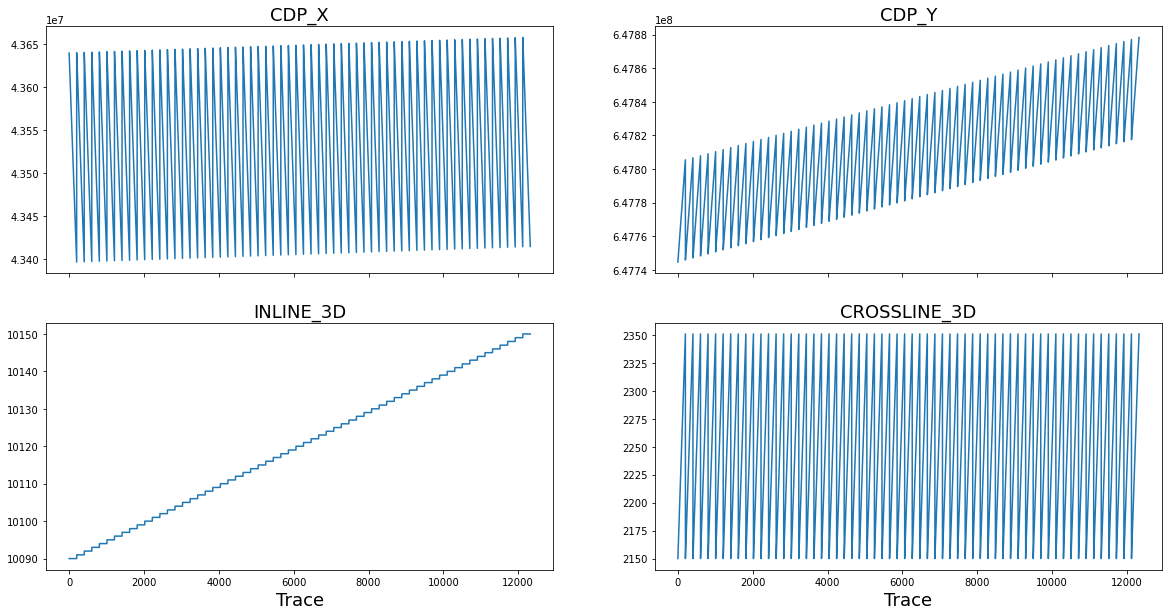

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True)

for ax, prop in zip(axs.ravel(), ["CDP_X", "CDP_Y", "INLINE_3D", "CROSSLINE_3D"]):
    ax.plot(trace_headers[prop])
    ax.set_title(prop, fontdict={"fontsize":18})

for ax in axs[1, :]:
    ax.set_xlabel("Trace", fontdict={"fontsize":18})

### Loading SEG-Y files - complete



Loading of SEG-Y data is also pretty straight forward, and in `segysak` there are a few different ways to go about it.

The most straight forward way is to use the multi-purpose function `segy_loader`. This function loads, 2D, 3D and gathers. There are a lot of options to customise the loader for most situations.

In [11]:
from segysak.segy import segy_loader
help(segy_loader)

Help on function segy_loader in module segysak.segy._segy_loader:

segy_loader(segyfile, cdp=None, iline=None, xline=None, cdpx=None, cdpy=None, offset=None, vert_domain='TWT', data_type='AMP', ix_crop=None, cdp_crop=None, xy_crop=None, z_crop=None, return_geometry=False, silent=False, extra_byte_fields=None, head_df=None, **segyio_kwargs)
    Load SEGY file into xarray.Dataset
    
    The output ncfile has the following structure
        Dimensions:
            d1 - CDP or Inline axis
            d2 - Xline axis
            d3 - The vertical axis
            d4 - Offset/Angle Axis
        Coordinates:
            iline - The inline numbering
            xline - The xline numbering
            cdp_x - Eastings
            cdp_y - Northings
            cdp - Trace Number for 2d
        Variables
            data - The data volume
        Attributes:
            TBC
    
    Args:
        segyfile (str): Input segy file path
        ncfile (str, optional): Output SEISNC file path. If no

In [12]:
# loading with default byte locations
seisnc_vol = segy_loader(segy_file)

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is CROSSLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

`segy_loader` returns an `xarray.Dataset` which has dimensions appropriate for the type of seismic loaded. In this case we have a 3D volume so our dimensions are `iline`, `xline`, and because we used the default option of `TWT` the vertical dimension is `twt`, but if you have a depth volume you can specify this in the `segy_loader` keyword arguments using `vert_domain="DEPTH"`.

The actual seismic data/volume is contained within the `data` variable, and we see this has the full dimensions of the cube. Whilst the `cdp_x` and `cdp_y` values from the trace headers don't have the vertical dimension.

There is also a number of attributes which are created by the loader and provide information about the loaded file.

In [13]:
print(seisnc_vol)

<xarray.Dataset>
Dimensions:  (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int32 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    perc

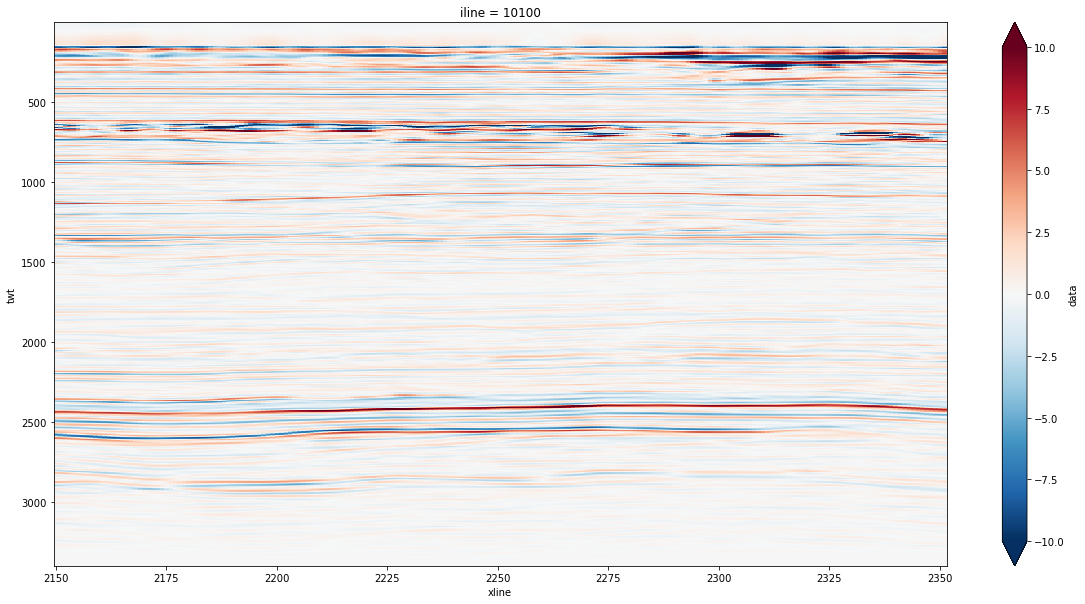

In [15]:
# lets quickly checkout our data - we'll talk about xarray basics in the next section
_ = seisnc_vol.sel(iline=10100).data.T.plot(yincrease=False, figsize=(20, 10), vmax=10)

Here is an example where we explicitly set the key header byte locations of `iline`, `xline`, `cdpx` & `cdpy`. If other values from the header are needed, the byte locations can be set using the `extra_byte_fields` keyword argument.

In [16]:
# specifying byte locations for key cube geometry
_ = segy_loader(
    segy_file,
    iline=189, xline=193, cdpx=181, cdpy=185,
    vert_domain="DEPTH",
    #extra_byte_fields=[117]
    extra_byte_fields={"my_name":117}
)
print(_)

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is CROSSLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (depth: 850, iline: 61, xline: 202)
Coordinates:
  * iline    (iline) int32 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * depth    (depth) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, depth) float32 0.02057 0.02204 0.01966 ... 0.0 0.0
    my_name  (iline, xline) int32 4000 4000 4000 4000 ... 4000 4000 4000 4000
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-tw

### Loading SEG-Y files - with filtering



It is also possible to filter the data being loading in using the cropping keywords. These can be used to restrict the amount of data being loaded in. In this example we load just a single in-line `10100`. 

Unfortunately to filter the data we still have to scan all the headers but the loaded volume is now smaller.

In [19]:
seisnc_vol_iline_10100 = segy_loader(segy_file, ix_crop=(10100, 10100, 2000, 3000))

  0%|          | 0.00/12.3k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

In [21]:
pd.set_option('display.max_rows', 500)
print(seisnc_vol_iline_10100)

<xarray.Dataset>
Dimensions:  (iline: 1, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int32 10100
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.34e+05 4.34e+05
    cdp_y    (iline, xline) float32 6.478e+06 6.478e+06 ... 6.478e+06 6.478e+06
Data variables:
    data     (iline, xline, twt) float32 -0.3492 -0.3322 -0.3406 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-15.941575553623583, -14.606181

Sometimes SEG-Y are really big and scanning the headers repeatedly can be awkward. 
Recall that we previous scanned the whole trace headers into a DataFrame. 
`segysak` allows us to perform filtering on the DataFrame, and use the filtered version for loading. 
This provides an enormous amount of flexibility on what data is loaded and means the headers only need to be scanned once on multiple loading events.

The trace header dataframe should be passed to the `head_df` keyword argument.

In [22]:
seisnc_vol_iline_block = segy_loader(
    segy_file,
    head_df=trace_headers[trace_headers["INLINE_3D"] <= 10100].copy()
)

Loading as 3D
Fast direction is CROSSLINE_3D


Converting SEGY:   0%|          | 0.00/12.3k [00:00<?, ? traces/s]

In [23]:
print(seisnc_vol_iline_block)

<xarray.Dataset>
Dimensions:  (iline: 11, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int32 10090 10091 10092 10093 ... 10097 10098 10099 10100
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.34e+05 4.34e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.478e+06 6.478e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percen

Other useful loading functions in `segysak`.
  - `segy.segy_converter` - Streams data from SEG-Y to NetCDF4 on disk
  - `segy.segy_freeloader` - Support for higher dimensional data (development branch).
  - `openzgy.zgy_loader` - Experimental support for ZGY based upon open ZGY.

## `xarray.Dataset` basics

Based upon the NetCDF file format for multi-variable, n-dimensional data.

<center> <img src="images/seisnc-diagram.png" alt='seisnc' width="50%" /> </center>

All of the intricacies of `xarray` are a bit beyond this tutorial but we'll try to quickly cover here some of the most useful ones with `segysak` seismic Datasets.
The different parts of the dataset can be accessed through properties of the class.
  - dimensions : `dim`
  - coordinates : `coords`
  - variables : `variables`
  - attributes : `attrs`

In [25]:
# dataset anatomy - dimensions, coordinates, variables, attributes - DataArray vs Dataset
seisnc_vol

<xarray.Dataset>
Dimensions:  (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int32 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.971982623347994, -6.520540334073794, -1.49142619...
    coord_scalar:        -100.0

Sub-selections with `xarray` are not made by using regular indexing like `numpy` for example because `xarray` does not guarentee the order of dimensions. The key methods for selection are `sel`, and `isel` which allow labelled selection.

In [26]:
# data selection - sel, isel

The values of any dimension, coordinates, and variables can be returned using the property.

In [27]:
# data as numpy array
seisnc_vol.iline.values

array([10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098,
       10099, 10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107,
       10108, 10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116,
       10117, 10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125,
       10126, 10127, 10128, 10129, 10130, 10131, 10132, 10133, 10134,
       10135, 10136, 10137, 10138, 10139, 10140, 10141, 10142, 10143,
       10144, 10145, 10146, 10147, 10148, 10149, 10150])

There are also a few useful methods to know about including `plot`, `interp`, `mean`, `max`, `min` and so on.

Two really important ones are `transpose` which lets you do labeled transposing of variables and `broadcast_like` which allows you to transform one variable or dataset to match another. 

In [28]:
# xarray methods (plot, interp, mean, min, max, transpose, broadcast_like, etc...)
# seisnc_vol.cdp_x.transpose("xline", "iline")

The last important thing to learn with `xarray` is how to assign data into variables. Because `DataSets` are multi-dimensional we also have to give `xarray` information about the dimensions of the data.

```python
print(seisnc_vol.dims)
seisnc_vol["zeros"] = (("iline", "xline", "twt"), np.zeros((61, 202, 850)))
seisnc_vol
```

In [29]:
# xarray variable assignment

## `xarray` FAQ

 - Why don't we make the global coordinates the dimensions?
 - How do I save/persist my changes.

Notes: 
Global coordinates are not orthogonal because the seismic grid rarely lines up with Grid North.
Persisting changes either means saving back to SEG-Y or using the NetCDF File Format. 

# NetCDF File Format

Common in climate science, binary, fast and lazy loading

(basically `xarray.Datataset` on disk)


## NetCDF

Why use “another” file format for seismic?

Generally it just makes working with seismic in Python easier. It will save you time if you are reading volumes repeatedly or can't store everything you need in memory.

NetCDF was the logical choice because it is at the core of `xarray` but `xarray` supports other data models such as zarr which are investigating.
There is also beta support within `segysak` for the OpenZGY format with instructions on Github about how to set that up.

 - Faster than SEG-Y for most use cases.

 - Widely supported within the Python scientific stack (xarray, dask).

 - Commonly supported in other languages.

Saving the data to netcdf requires the use of the seisio accessor due to limitations on the types of attributes that can be
saved using the xarray method.



In [ ]:
# output the data to netcdf
seisnc_vol.seisio.to_netcdf("data/test.seisnc")

In [ ]:
if platform.system() == "Windows":
    !dir data\.
else: ## linux
    !ls data/.

We can check to see if the seisnc NetCDF file was created ok by reimporting it. To get it back into the same form that `segysak` uses we can use the `open_seisnc` function. `open_seisnc` is a thin wrapper around the `xarray.open_dataset` method that includes some special handling for segysak attributes and ensures that the dataset is opened with the `.seis` extension for xarray which we will talk about soon.

In [ ]:
from segysak import open_seisnc
open_seisnc("data/test.seisnc")

# Saving to SEG-Y

Generally if you have loaded a SEG-Y file and edited it, you can then save that file back to a new SEG-Y in one line.
Currently SEGY-SAK doesn't support editing SEG-Y in place but it is something that might come in the future if the demand is
there (or you could help develop this for us). 

There are a few attributes that `segysak` needs to write your new SEG-Y file.
  - `coord_scalar` (int)
  - `sample_rate` (float)
  - `source_file` (str)
  
It also needs dimensions from one of the dimension sets. 

In [ ]:
from segysak.segy import segy_writer
help(segy_writer)

In [ ]:
test = seisnc_vol.copy()
test.attrs = {"coord_scalar":-100, "sample_rate":4.0, "source_file":""}

If byte locations need to be changed for specific software the `trace_header_map` keyword is available. Any variable keys in the dataset can be assigned to a trace header byte location.

In this example we set the `iline` to go to byte location 21.

In [ ]:
# export in memory dataset to segy
segy_writer(test, "data/test.segy", trace_header_map={"iline":21})

If we create variables that cover the trace header dimensions (iline/xline) then these can also be included in the output to SEG-Y by specifying the variable key and the byte location where the variable should be placed.

In [ ]:
# write other variables
seisnc_vol["xy"] = seisnc_vol["cdp_x"] * seisnc_vol["cdp_y"] / 1E10
seisnc_vol
# segy_writer(seisnc_vol, "data/test.segy", trace_header_map={"xy":13})

Lets read the headers of that SEG-Y and see what we got. The output has been converted to int so our floating point values are gone. This is a limitation of the SEG-Y format. Any floating point numbers must be scaled to int and back again on loading. This is done automatically for coordinates but all other values must be handled manually.

In [ ]:
segy_header_scrape("data/test.segy").T

# 10 Minute Break

In [ ]:
import time
from tqdm.auto import tqdm

with tqdm(desc="Break Timer", total=10*60, bar_format="{l_bar}{bar} {elapsed_s:.0f}/{total} seconds") as pbar:
    start = time.time()
    now = time.time()
    prev_now = now
    while (now - start) < 10*60:
        pbar.update(now - prev_now)
        time.sleep(1)
        prev_now = now
        now = time.time()
    pbar.update(time.time() - prev_now)

# Horizon extraction

 - Load a horizon and add it to a cube
 - Plotting maps
 - Plotting horizons on vertical slices
 - Extracting seismic ampltidues along a horizon

## Load some seismic horizon data

Lets start by specifying the path to some seismic horizon data and checking it is available.

In [30]:
top_hugin_path = pathlib.Path("data/hor_twt_hugin_fm_top.dat")
print("File", top_hugin_path, "exists?", top_hugin_path.exists())

File data\hor_twt_hugin_fm_top.dat exists? True


If we quickly look at the first few lines of the file we can see it is a space delimited file with three columns.
UTM X, UTM Y and TWT. 

In [31]:
# check the file layout
with open(top_hugin_path) as f:
    lines = [next(f) for i in range(5)]
print(*lines)

432186.713151 6477029.155731 2776.275147
 432189.737524 6477041.284339 2779.657715
 432192.761898 6477053.412947 2780.465088
 432195.786271 6477065.541555 2780.949951
 432198.810645 6477077.670163 2781.769775



It is then quite straightforward to load the file in using `pandas.read_csv`.

In [32]:
# is a csv file
top_hugin_df = pd.read_csv(top_hugin_path, names=["cdp_x","cdp_y","twt_hugin"], sep=' ')
top_hugin_df.head()

,cdp_x,cdp_y,twt_hugin
0,432186.713151,6.477029e+06,2776.275147
1,432189.737524,6.477041e+06,2779.657715
2,432192.761898,6.477053e+06,2780.465088
3,432195.786271,6.477066e+06,2780.949951
4,432198.810645,6.477078e+06,2781.769775


When the horizon is in this format it might not map directly to the seismic trace locations. To simplify the process of interpolating the horizon to the seismic trace locations, `segysak` has a `surface_from_points` method in the `.seis` accessor. By default, this method will try to interpolate using `cdp_x` and `cdp_y` from the dataset but these options can be changed.

A new dataset is returned with the same dimensions as the seismic volume but now with the horizon data.

In [33]:
top_hugin_ds = seisnc_vol.seis.surface_from_points(top_hugin_df, 'twt_hugin', right=('cdp_x', 'cdp_y'))
print(top_hugin_ds)

<xarray.Dataset>
Dimensions:    (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline      (iline) int32 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline      (xline) int32 2150 2151 2152 2153 2154 ... 2348 2349 2350 2351
  * twt        (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x      (iline, xline) float32 4.364e+05 4.364e+05 ... 4.341e+05
    cdp_y      (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06
Data variables:
    twt_hugin  (iline, xline) float64 2.741e+03 2.742e+03 ... 2.635e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-6.9

## Plotting Maps

For plotting we can use the built in plot command that comes with `xarray` datasets. This is wrapper around a call to `matplotlib` and allows us to get quickly formatted plots of the data.

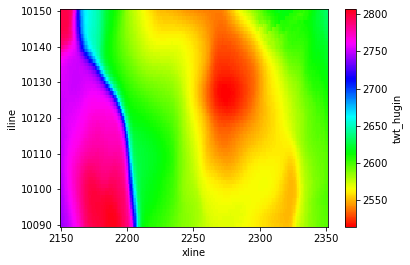

In [34]:
top_hugin_ds.twt_hugin.plot(cmap='hsv')

This plotting is done on the local iline/xline grid which defines the cube though, and often we want to see things in a UTM X and  Y type context.

There are a couple of ways to go about this.
  - One way is use explicit plotting based upon the x and y coordinates in the dataframe.
  - Another is to use a transform argument for `matplotlib`'s plotting commands.

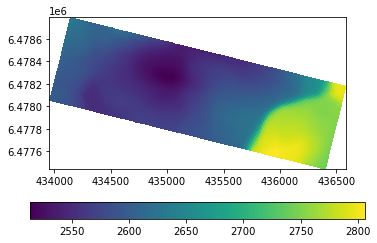

In [35]:
axs = plt.subplot()
mesh = axs.pcolormesh(
    top_hugin_ds.cdp_x.values,
    top_hugin_ds.cdp_y.values,
    top_hugin_ds.twt_hugin.values,
    shading="auto"
)
axs.set_aspect(1)
_ = plt.colorbar(mesh, orientation="horizontal")

Using the transform can be useful when we want to plot objects using iline/xline notation but in x-y coordinate space, like an inline location for example (10100). We can also use the inverted form of the transform to convert x and y coordinates to iline and xline. `segysak` also has the `.seis.xysel` method to extract seismic based upon x and y trace locations. 

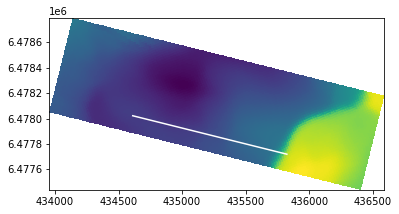

In [36]:
tform = seisnc_vol.seis.get_affine_transform()

axs = plt.subplot()
mesh = axs.pcolormesh(
    top_hugin_ds.iline,
    top_hugin_ds.xline,
    top_hugin_ds.twt_hugin.T,
    shading="auto",
    transform=tform + axs.transData
)
axs.set_aspect(1)
_ = axs.plot([10100, 10100], [2200, 2300], transform=tform + axs.transData, color="w")

## Plotting Horizons on vertical section views

The horizon data can also be assigned back to the original seismic dataset. This can be useful for doing simultaneous sub-selection of the two variables at once. The dimensions of the data don't need to be specified in this case because the `top_hugin_ds` dataset already has the dimensions assigned. `xarray` will automagically line up those named dimensions with common named dimensions in `seisnc_vol`. Where the dimensions don't line up or new dimensions are included they will be extended or added to `seisnc_vol`.

In [37]:
# assign horizon back to seismic
seisnc_vol["hugin"] = top_hugin_ds.twt_hugin
print(seisnc_vol)

<xarray.Dataset>
Dimensions:  (iline: 61, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int32 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float32 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
    hugin    (iline, xline) float64 2.741e+03 2.742e+03 ... 2.632e+03 2.635e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    ((436400.5, 6477447.0), (433962.66, 6478055.0), 

Combining the horizon into the seismic dataset can make many subsequent tasks much simpler. For example, here we sub-select a single inline once, and then use the reference in two subsequent plotting calls, once for the seismic, and then again for the horizon. Note that the state of `iline_subsel` as a view or copy depends on a lot of things that are a little hard to predict with `xarary`.

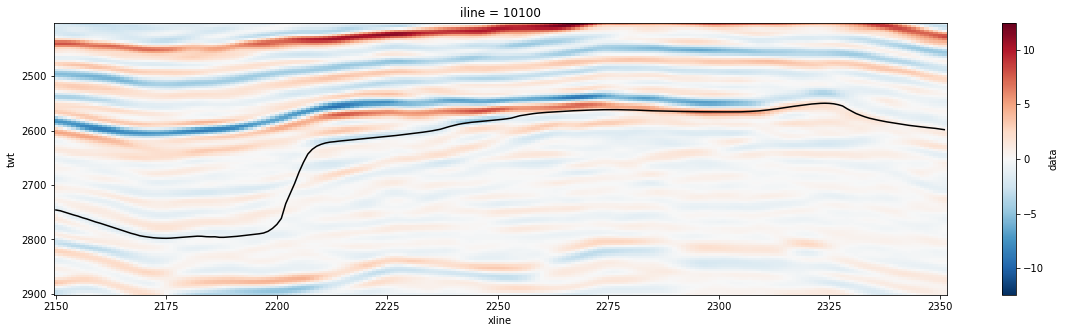

In [38]:
# plotting
iline_subsel = seisnc_vol.sel(iline=10100, twt=range(2402, 2900, 4), method='nearest')
fig, axs = plt.subplots(figsize=(20, 5))
iline_subsel.data.T.plot(ax=axs, yincrease=False)
_ = axs.plot(iline_subsel.xline, iline_subsel.hugin, 'k')

## Seismic amplitude maps

Extracting the intersection of a horizon with a seismic volume is realy simple in `xarray`. It is literally one line. In this case, `xarray` understands the `iline` and `xline` relationship between the input DataArray `seisnc_vol.hugin` and the seismic volume. When we pass it via the `interp` method, `xarray` performs a linear interpolation to find the intersection point returning a new amplitude DataArray.

In [39]:
amp = seisnc_vol.data.interp({"twt": seisnc_vol.hugin}, method='linear')

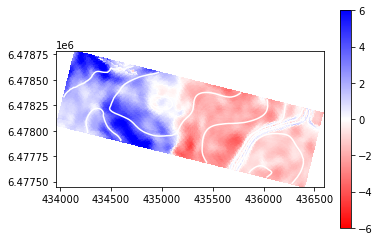

In [40]:
axs = plt.subplot()
mesh = axs.pcolormesh(amp.iline, amp.xline, amp.T, transform=tform + axs.transData, shading="auto", cmap="bwr_r", vmin=-6, vmax=6)
ctr = axs.contour(top_hugin_ds.cdp_x, top_hugin_ds.cdp_y, top_hugin_ds.twt_hugin, colors='w')
axs.set_aspect(1)
plt.colorbar(mesh)


# Mapping functions over blocks

 - Learn how to use Xarray to map functions on blocks of data, such as trace maths.

  - Horizon Flattening
<img src="images/hflat.png" alt="hflat" style="width: 60%;"/>

To do this we will introduce the `groupby` method for a dataset but to make it useful we need to create a trace identifier. `groupby` actually uses `pandas` in the backend and is the same. It will create a group of datasets based upon the key or keys that can be submitted to a function to perform operations.

In [41]:
for grp, subds in seisnc_vol.groupby(seisnc_vol.iline):
    print(grp)
    print(subds)
    break

10090
<xarray.Dataset>
Dimensions:  (twt: 850, xline: 202)
Coordinates:
    iline    int32 10090
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (xline) float32 4.364e+05 4.364e+05 4.364e+05 ... 4.34e+05 4.34e+05
    cdp_y    (xline) float32 6.477e+06 6.477e+06 ... 6.478e+06 6.478e+06
Data variables:
    data     (xline, twt) float32 0.02057 0.02204 0.01966 ... 0.0 0.0 0.0
    hugin    (xline) float64 2.741e+03 2.742e+03 ... 2.596e+03 2.596e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    ((436400.5, 6477447.0), (433962.66, 6478055.0), (434...
    source_file:         volve10r12-full-twt-sub3d.sgy
    srd:        

In [42]:
# create a trace identifier
seisnc_vol["trace"] = (("iline", "xline"), np.arange(61*202, dtype=int).reshape(61, 202))

In [43]:
for grp, subds in seisnc_vol.groupby("trace"):
    print(grp)
    print(subds)
    break

0
<xarray.Dataset>
Dimensions:              (stacked_iline_xline: 1, twt: 850)
Coordinates:
  * twt                  (twt) float64 4.0 8.0 12.0 ... 3.396e+03 3.4e+03
    cdp_x                (stacked_iline_xline) float32 4.364e+05
    cdp_y                (stacked_iline_xline) float32 6.477e+06
  * stacked_iline_xline  (stacked_iline_xline) MultiIndex
  - iline                (stacked_iline_xline) int64 10090
  - xline                (stacked_iline_xline) int64 2150
Data variables:
    data                 (twt, stacked_iline_xline) float32 0.02057 ... 0.0
    hugin                (stacked_iline_xline) float64 2.741e+03
    trace                (stacked_iline_xline) int32 0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    ((436400.5, 6477

The next step is writing a function that takes advantage of the data as it is made available from `groupby`.
To flatten the group be need to shift the time axis for each trace so that the horizon occurs at a constant time. The simplest way to do this is just to make that constant zero, so we subtract the horizon value form the time axis. 

Xarray also requires that our output cube be regularly sampled, so arbitraty shifts for each trace need to be resampled to a regular grid. That can be done using the `interp` function. `interp` applies a chosen interpolation methods (in this case linear interpolation) to resample the data against a new twt axis which we will call `twt_out`. Then the resampled trace is returned.

In [44]:
def hflat(ds, hor_var, twt_out):
    trace_out = ds.copy()
    trace_out["twt"] = ds.twt - np.squeeze(ds[hor_var].values)
    return trace_out.data.interp(twt=twt_out)

We are also going to need to specify what the output time dimension should be (`twt_out` in our function). We know that subtracting the horizon TWT from the TWT grid will result in a new full TWT grid that goes from -hor_max to twt_max-hor_min of the input horizon. So we create a flattened TWT range with a sample interval of 1ms.

In [45]:
flat_twt = np.arange(-seisnc_vol.hugin.max(), seisnc_vol.twt.max()-seisnc_vol.hugin.min(), 1, dtype=int)

To recombine all the data back into a single `dataset` we can tag the `map` function onto the end of `groupby`. Doing this automatically applied what pandas and xarray call `split-apply-combine` logic, and is really handy.

Here I'm just going to apply the process to a single inline.

In [46]:
# applying groupby().map()
tg_gby = seisnc_vol.sel(iline=10100).groupby("trace").map(hflat, args=("hugin", flat_twt))

Lets plot up our normal and flattened volumes.

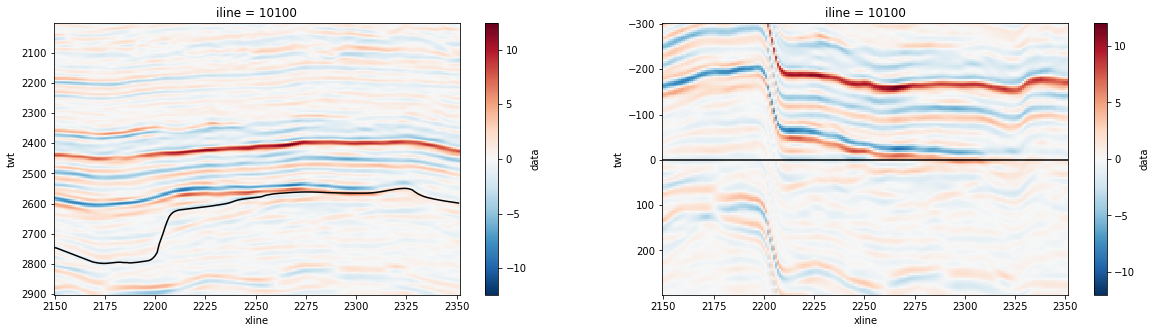

In [47]:
# plotting results
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
seisnc_vol \
    .sel(iline=10100, twt=range(2002, 2900, 4), method='nearest') \
    .data.T.plot(ax=axs[0], yincrease=False)
axs[0].plot(seisnc_vol.sel(iline=10100).xline, seisnc_vol.sel(iline=10100).hugin, 'k')
tg_gby \
    .sel(twt=range(-300, 300, 4), method='nearest') \
    .T.plot(ax=axs[1], yincrease=False)
axs[1].hlines(0, 0, 10000, "k")

Groupby is generally fine for small volumes, but when you start to scale up your datasize it can run into issues. Xarray links nicely to the `dask` distributed processing library and it can even lazyily load data from disk that won't fit into memory. There is `dask` tutorial on the SEGY-SAK RTD website but today I'm just going to demonstrate how we can use the experimental `map_blocks` function to to achieve the same outcome as `groupby` but in a `dask` friendly way.

Xarray has a chunking feature which allows you to break your Dataset down into smaller operational blocks. In this case we want the blocks to match the size of our operations which is just 1 trace. 

Because we won't necesarilly be doing the whole operation at once with `map_blocks` we also need to tell xarray what we think the output of our function will look like. This is done using a template. In our case the output is the same in every way, except the time dimension is resampled. Here we can just resample that dimension using `interp` to get the right output template shape.

Note that the template is not actually calculated, just a place holder is created. This is because when we chunk xarray Datasets or DataArrays, every operation is delayed until the last possible moment. This is good for memory management and really simplifies the whole process. In this instance if you wanted the template computed you could either call `template.compute()` or access the numpy `values` array of the data variable.

Then, similar to `groupby` we pass `map_blocks` the flattening function, the extra arguments, and now also the template.

In [48]:
seisnc_vol_chkd = seisnc_vol.chunk({"iline":1, "xline":1})
template = seisnc_vol_chkd.interp(twt=flat_twt)
tg_mb = seisnc_vol_chkd.map_blocks(hflat, args=("hugin", flat_twt), template=template.data)

`tg_mb` is also a delayed object here. There is a task registered for each trace, but they will only be calculated when we ask for the data. Such as when we perform plotting. To get the full volume, we have to call `compute` again.

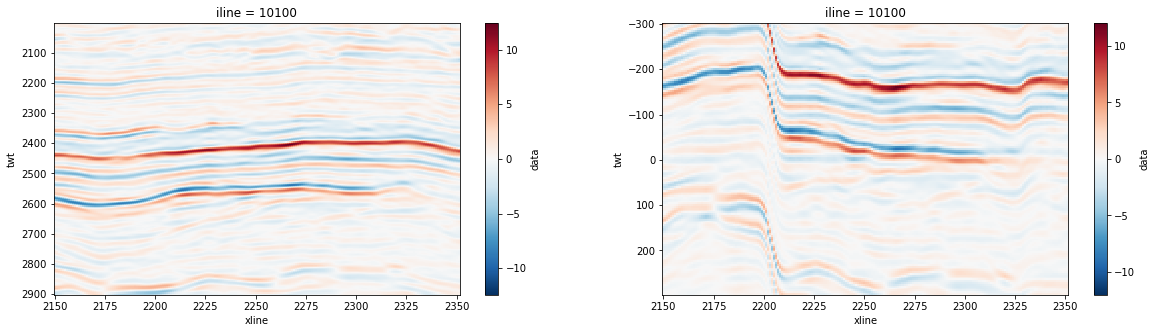

In [50]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
seisnc_vol.sel(iline=10100, twt=range(2002, 2900, 4), method='nearest').data.T.plot(ax=axs[0], yincrease=False)
tg_mb.sel(iline=10100, twt=range(-300, 300, 4), method='nearest').T.plot(ax=axs[1], yincrease=False)

## `map_blocks` final thoughts

  - Not super mature yet but very useful.
  - Slightly different way of thinking to Python's normal instant run/result.
  - Other useful delayed functions are: `to_netcdf`, `rolling`, `interp`, but most xarray operations can be delayed.

# Vectorization of Seismic

 - I want to do machine learning and I need to tabularize my seismic and headers.
 - Now I need to send my results back to SEG-Y.


Converting an `xarray.Dataset` to a `pandas.DataFrame` is really simple due to the close ties between the two packages.

In [51]:
# creating a table from seismic
seisnc_vol_df = seisnc_vol.isel(iline=10).to_dataframe()
print(seisnc_vol_df)

              iline      data         cdp_x      cdp_y        hugin  trace
twt    xline                                                              
4.0    2150   10100 -0.349210  436430.75000  6477568.5  2745.957329   2020
       2151   10100 -0.313009  436418.62500  6477571.0  2747.446582   2021
       2152   10100 -0.279518  436406.46875  6477574.5  2750.012930   2022
       2153   10100 -0.260991  436394.34375  6477577.5  2752.640056   2023
       2154   10100 -0.275455  436382.21875  6477580.0  2755.115650   2024
...             ...       ...           ...        ...          ...    ...
3400.0 2347   10100  0.000000  434041.43750  6478163.5  2594.191259   2217
       2348   10100  0.000000  434029.28125  6478167.0  2595.016237   2218
       2349   10100  0.000000  434017.15625  6478170.0  2595.884457   2219
       2350   10100  0.000000  434005.03125  6478173.5  2597.032151   2220
       2351   10100  0.000000  433992.90625  6478176.0  2598.204522   2221

[171700 rows x 6 columns

The Dataframe will have what `pandas` calls a multi-index, so to remove it we just need to reset the index. Note this will have a big impact upon your memory footprint.

In [52]:
seisnc_reindex = seisnc_vol_df.reset_index()
print(seisnc_reindex)

           twt  xline  iline      data         cdp_x      cdp_y        hugin  \
0          4.0   2150  10100 -0.349210  436430.75000  6477568.5  2745.957329   
1          4.0   2151  10100 -0.313009  436418.62500  6477571.0  2747.446582   
2          4.0   2152  10100 -0.279518  436406.46875  6477574.5  2750.012930   
3          4.0   2153  10100 -0.260991  436394.34375  6477577.5  2752.640056   
4          4.0   2154  10100 -0.275455  436382.21875  6477580.0  2755.115650   
...        ...    ...    ...       ...           ...        ...          ...   
171695  3400.0   2347  10100  0.000000  434041.43750  6478163.5  2594.191259   
171696  3400.0   2348  10100  0.000000  434029.28125  6478167.0  2595.016237   
171697  3400.0   2349  10100  0.000000  434017.15625  6478170.0  2595.884457   
171698  3400.0   2350  10100  0.000000  434005.03125  6478173.5  2597.032151   
171699  3400.0   2351  10100  0.000000  433992.90625  6478176.0  2598.204522   

        trace  
0        2020  
1      

In [53]:
print(seisnc_vol_df.info())
print(seisnc_reindex.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 171700 entries, (4.0, 2150) to (3400.0, 2351)
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   iline   171700 non-null  int32  
 1   data    171700 non-null  float32
 2   cdp_x   171700 non-null  float32
 3   cdp_y   171700 non-null  float32
 4   hugin   171700 non-null  float64
 5   trace   171700 non-null  int32  
dtypes: float32(3), float64(1), int32(2)
memory usage: 5.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171700 entries, 0 to 171699
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   twt     171700 non-null  float64
 1   xline   171700 non-null  int64  
 2   iline   171700 non-null  int32  
 3   data    171700 non-null  float32
 4   cdp_x   171700 non-null  float32
 5   cdp_y   171700 non-null  float32
 6   hugin   171700 non-null  float64
 7   trace   171700 non-null  int32  
dtypes: flo

When operations have been completed in the tabular format we can return to `xarray`. First the multi-index must be restored to get the coordinates right.

In [54]:
seisnc_df_multi = seisnc_reindex.set_index(["iline", "xline", "twt"])
print(seisnc_df_multi)

                        data         cdp_x      cdp_y        hugin  trace
iline xline twt                                                          
10100 2150  4.0    -0.349210  436430.75000  6477568.5  2745.957329   2020
      2151  4.0    -0.313009  436418.62500  6477571.0  2747.446582   2021
      2152  4.0    -0.279518  436406.46875  6477574.5  2750.012930   2022
      2153  4.0    -0.260991  436394.34375  6477577.5  2752.640056   2023
      2154  4.0    -0.275455  436382.21875  6477580.0  2755.115650   2024
...                      ...           ...        ...          ...    ...
      2347  3400.0  0.000000  434041.43750  6478163.5  2594.191259   2217
      2348  3400.0  0.000000  434029.28125  6478167.0  2595.016237   2218
      2349  3400.0  0.000000  434017.15625  6478170.0  2595.884457   2219
      2350  3400.0  0.000000  434005.03125  6478173.5  2597.032151   2220
      2351  3400.0  0.000000  433992.90625  6478176.0  2598.204522   2221

[171700 rows x 5 columns]


And then we just use the `to_xarray` method.

In [55]:
seisnc_xr = seisnc_df_multi.to_xarray()
print(seisnc_xr)

<xarray.Dataset>
Dimensions:  (iline: 1, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int64 10100
  * xline    (xline) int64 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
Data variables:
    data     (iline, xline, twt) float32 -0.3492 -0.3322 -0.3406 ... 0.0 0.0 0.0
    cdp_x    (iline, xline, twt) float32 4.364e+05 4.364e+05 ... 4.34e+05
    cdp_y    (iline, xline, twt) float32 6.478e+06 6.478e+06 ... 6.478e+06
    hugin    (iline, xline, twt) float64 2.746e+03 2.746e+03 ... 2.598e+03
    trace    (iline, xline, twt) int32 2020 2020 2020 2020 ... 2221 2221 2221


The process isn't perfect though, we can see that 'cdp_x' and 'cdp_y' have come back as 3d cubes. And we will need to reset all the seisnc attributes are missing before we can export the data to SEG-Y using `segy_writer`.

In [56]:
seisnc_xr.attrs = seisnc_vol.attrs
display(seisnc_xr.attrs)

{'ns': None,
 'sample_rate': 4.0,
 'text': Text HeaderC 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:15:00
 C 2 Name: ST10010ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534
 ÝCroC 3
 C 4 First inline: 10090  Last inline: 10150
 C 5 First xline:  2150   Last xline:  2351
 C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
 C 7 X min: 433955.09 max: 436589.56 delta: 2634.47
 C 8 Y min: 6477439.46 max: 6478790.23 delta: 1350.77
 C 9 Time min: -3402.00 max: -2.00 delta: 3400.00
 C10 Lat min: 58.25'52.8804"N max: 58.26'37.9493"N delta: 0.00'45.0689"
 C11 Long min: 1.52'7.1906"E max: 1.54'50.9616"E delta: 0.02'43.7710"
 C12 Trace min: -3400.00 max: -4.00 delta: 3396.00
 C13 Seismic (template) min: -58.55 max: 54.55 delta: 113.10
 C14 Amplitude (data) min: -58.55 max: 54.55 delta: 113.10
 C15 Trace sample format: IEEE floating point
 C16 Coordinate scale factor: 100.00000
 C17
 C18 Binary header locations:
 C19 Sample interval             

In [57]:
seisnc_xr["cdp_x"] = seisnc_xr["cdp_x"].mean(dim=["twt"])
seisnc_xr["cdp_y"] = seisnc_xr["cdp_y"].mean(dim=["twt"])
seisnc_xr = seisnc_xr.set_coords(["cdp_x", "cdp_y"])
print(seisnc_xr)

<xarray.Dataset>
Dimensions:  (iline: 1, twt: 850, xline: 202)
Coordinates:
  * iline    (iline) int64 10100
  * xline    (xline) int64 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * twt      (twt) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 4.364e+05 4.364e+05 ... 4.34e+05 4.34e+05
    cdp_y    (iline, xline) float32 6.478e+06 6.478e+06 ... 6.478e+06 6.478e+06
Data variables:
    data     (iline, xline, twt) float32 -0.3492 -0.3322 -0.3406 ... 0.0 0.0 0.0
    hugin    (iline, xline, twt) float64 2.746e+03 2.746e+03 ... 2.598e+03
    trace    (iline, xline, twt) int32 2020 2020 2020 2020 ... 2221 2221 2221
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    ((436400.5, 6477447.0), 

# Questions - Slack time because we will run over.

 - Fall backs to chat about memory management, dask, other file formats such as ZGY and Zarr
 - Demo of CLI for quick looks at headers or EBCIDC
 - Contribution Opportunities / Community led development
